In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv('./datasets/sales_data.csv')
df['QUANTITYORDERED'].head()

0    30
1    34
2    41
3    45
4    49
Name: QUANTITYORDERED, dtype: int64

# 1. Univariate Plots

## 1.1 Plot 1 column

#### Histogram
- Show underlying frequency distribution of the data
- Group numbers into ranges and tells us how many values of a variable lie in every range

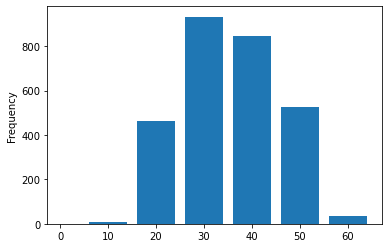

In [3]:
df['QUANTITYORDERED'].plot(
    kind='hist',
    bins=[0,5,15,25,35,45,55,65], # [0-5] [5-15] [15-25] ...
    rwidth=0.8)
plt.show()

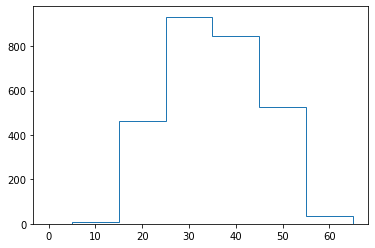

In [4]:
plt.hist(
    df['QUANTITYORDERED'],
    bins=[0,5,15,25,35,45,55,65], # [0-5] [5-15] [15-25] ...
    range=(0, 60),
    facecolor="r",
    histtype = 'step');

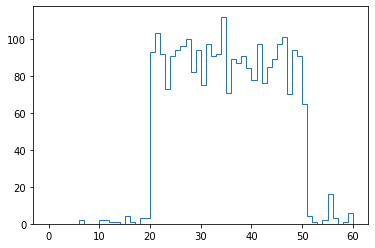

In [5]:
plt.hist(
    df['QUANTITYORDERED'],
    bins=60,
    range=(0, 60),
    facecolor="r",
    histtype = 'step');

#### Density plots
- Represent the distribution of a numeric variable.
+ Uses a density estimate to show the probability density function(PDF) of the variable
+ = smoothed version of the histogram

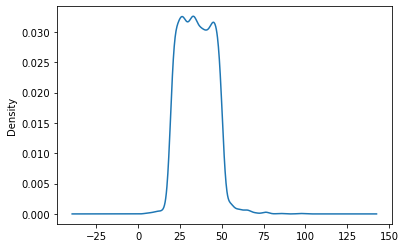

In [6]:
df['QUANTITYORDERED'].plot(kind='density')
plt.show()

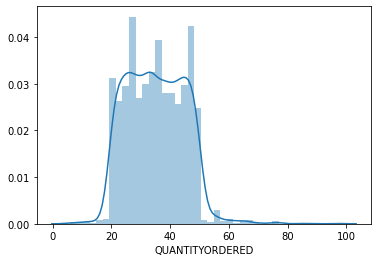

In [7]:
import seaborn as sns

sns.distplot(df['QUANTITYORDERED']);

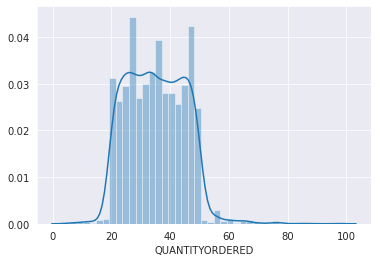

In [8]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(df['QUANTITYORDERED'], kde = True);

#### Combine Density + Bar

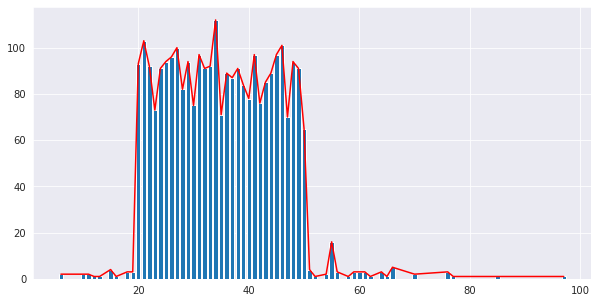

In [9]:
from collections import defaultdict
from operator import itemgetter

def plot_density_bar(data):
    # Create frequency list from data
    freq = defaultdict(int)
    for idx, val in data.items():
        freq[val] += 1
    freq = dict(sorted(freq.items(), key=itemgetter(0)))

    # Visualize
    plt.figure(figsize=(10,5))
    plt.bar(
        x=freq.keys(),
        height=freq.values())
    plt.plot(
        freq.keys(),
        freq.values(),
        color='r')
    plt.show()


plot_density_bar(df['QUANTITYORDERED'])

#### Combine Density + Histogram

In [10]:
from collections import defaultdict
from operator import itemgetter

def plot_density_hist(data, bins=None):
    # Create frequency list from data
    freq = defaultdict(int)
    for idx, val in data.items():
        freq[val] += 1
    freq = dict(sorted(freq.items(), key=itemgetter(0)))

    if bins == None:
        bins = len(freq)

    # Visualize
    plt.figure(figsize=(10,5))
    plt.hist(
        data,
        bins=bins,
        rwidth=0.8)
    plt.plot(
        freq.keys(),
        freq.values(),
        color='r')
    plt.show()

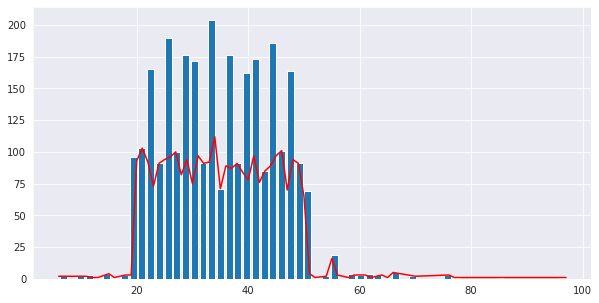

In [11]:
plot_density_hist(df['QUANTITYORDERED'])

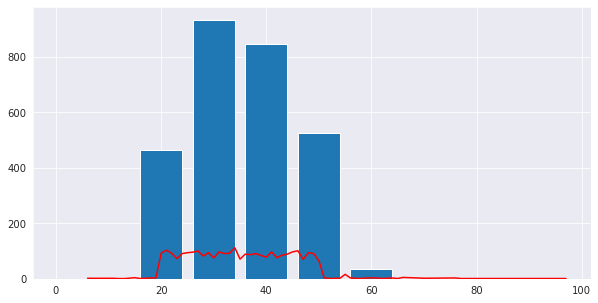

In [12]:
plot_density_hist(
    data=df['QUANTITYORDERED'],
    bins=[0,5,15,25,35,45,55,65])

## 1.2 Multiple columns

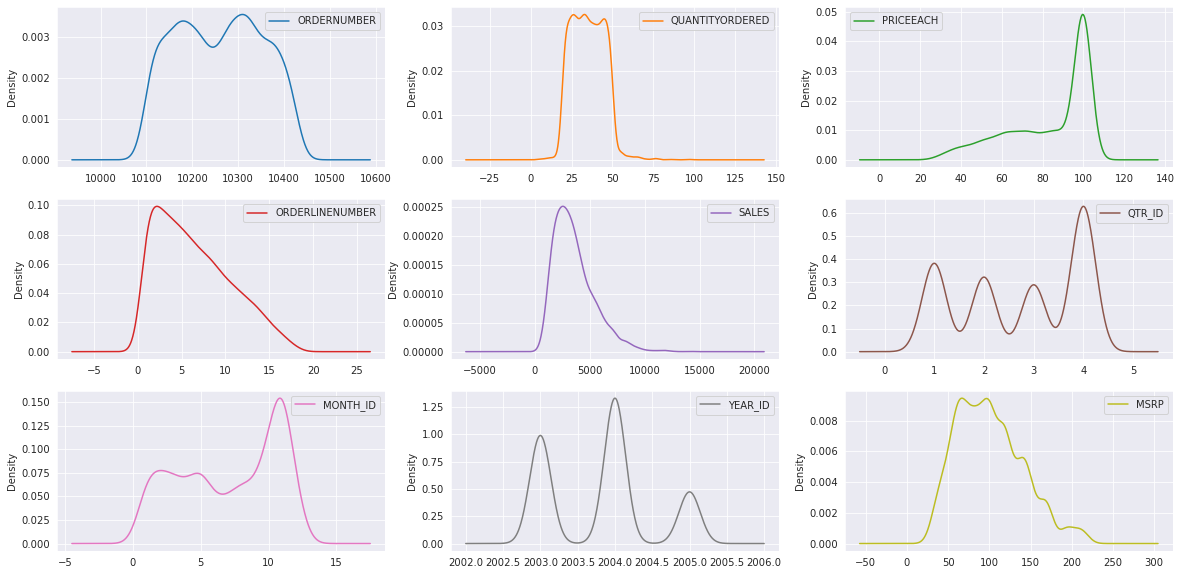

In [13]:
df.plot(
    kind='density',
    subplots=True,
    layout=(3,3),
    sharex=False, sharey=False,
    figsize=(20,10))
plt.show()

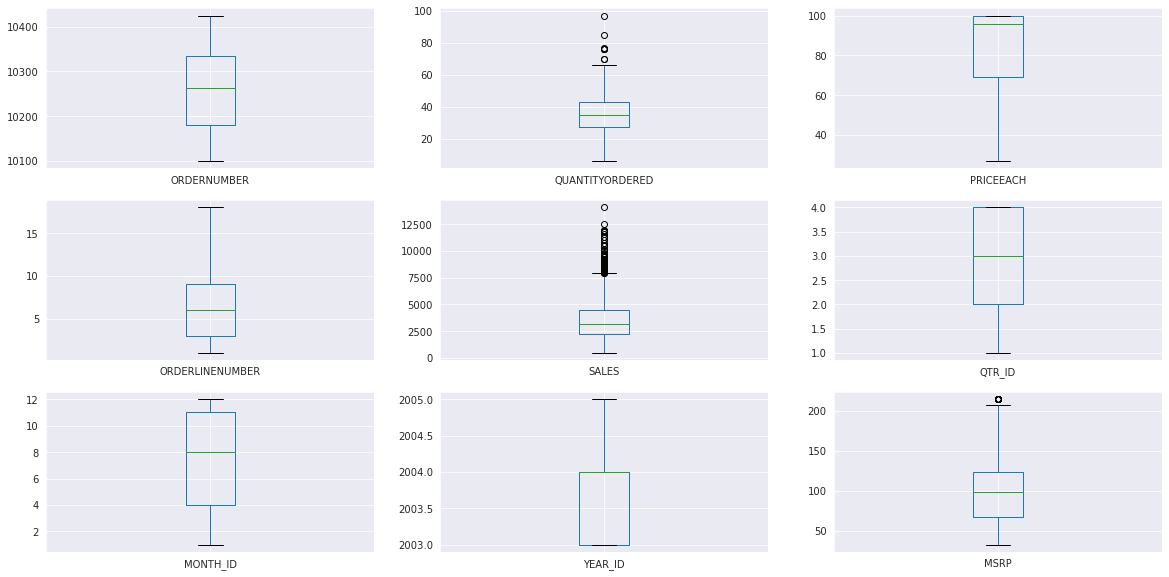

In [14]:
df.plot(
    kind='box',
    subplots=True,
    layout=(3,3),
    sharex=False, sharey=False,
    figsize=(20,10))
plt.show()

# 2. Bivariate Plots
- Show the relationship between 2 variables

#### Scatter plot
- Show the correlation

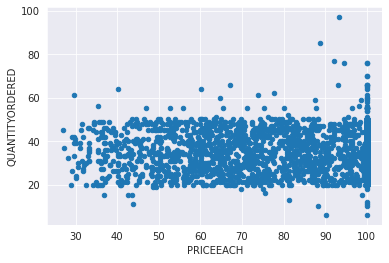

In [15]:
df.plot(
    kind='scatter',
    x ='PRICEEACH', y ='QUANTITYORDERED')
plt.show()

#### Bar plot
- Bar plot = histogram for bivariate plot
    + x-axis: A grouped-by variable
    + y-axis: length of the bars

,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Motorcycles,1166388.34
Planes,975003.57
Ships,714437.13
Trains,226243.47
Trucks and Buses,1127789.84
Vintage Cars,1903150.84


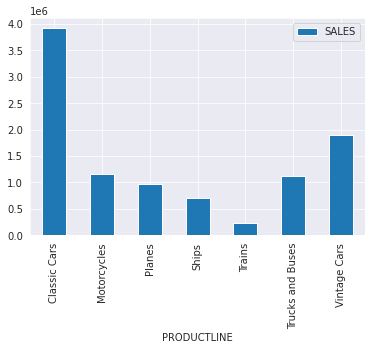

In [16]:
# 1 groupby variable
grouped_df = df[['PRODUCTLINE', 'SALES']] \
    .groupby('PRODUCTLINE') \
    .sum()

grouped_df.plot(
    kind='bar',
    y='SALES')

display(grouped_df)
plt.show()

SALES
YEAR_ID PRODUCTLINE                 
2003    Classic Cars      1484785.29
        Motorcycles        370895.58
        Planes             272257.60
        Ships              244821.09
        Trains              72802.29
        Trucks and Buses   420429.93
        Vintage Cars       650987.76
2004    Classic Cars      1762257.09
        Motorcycles        560545.23
        Planes             502671.80
        Ships              341437.97
        Trains             116523.85
        Trucks and Buses   529302.89
        Vintage Cars       911423.77
2005    Classic Cars       672573.28
        Motorcycles        234947.53
        Planes             200074.17
        Ships              128178.07
        Trains              36917.33
        Trucks and Buses   178057.02
        Vintage Cars       340739.31

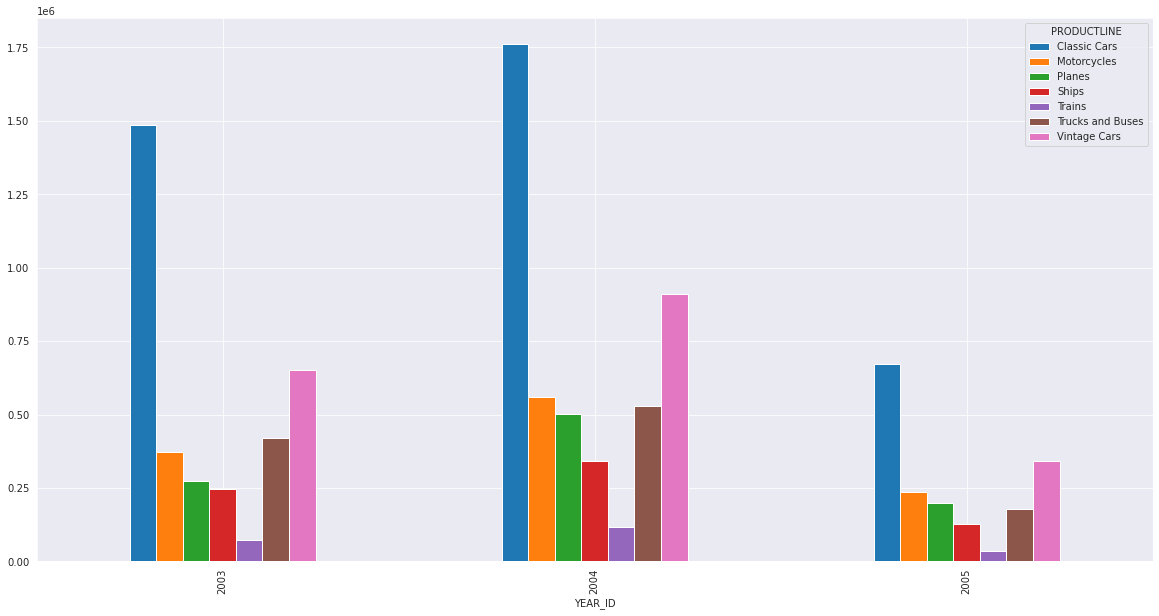

In [17]:
# 2 groupby variable
grouped_df = df[['PRODUCTLINE', 'SALES', 'YEAR_ID']] \
    .groupby(['YEAR_ID','PRODUCTLINE']) \
    .sum()

grouped_df.unstack().plot(
    kind='bar',
    y='SALES',
    figsize=(20,10))

display(grouped_df)
plt.show()